In [30]:
import uvcombine
from astropy.io import fits
from spectral_cube import SpectralCube, Projection

In [31]:
beuther = SpectralCube.read('../beuther/G351_cont.fits')
sanhueza = SpectralCube.read('../sanhueza/G351.77/G351.77-0.54.config8.cont_avg.selfcal_0.5_hogbom.image.fits'                         )

In [32]:
combo_ = uvcombine.feather_simple(beuther[0].hdu,
                                 sanhueza[0].hdu)

In [33]:
combohdu = fits.PrimaryHDU(combo_.real, header=beuther[0].header)
combo = Projection.from_hdu(combohdu)

In [39]:
%matplotlib inline
import numpy as np
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['font.size'] = 14
from spectral_cube import SpectralCube
from astropy import units as u
from astropy import visualization
from astropy.visualization import quantity_support, simple_norm
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2ac6f046cc10>

In [40]:
pl.imshow(np.abs(combo), origin='lower', norm=simple_norm(np.abs(combo), max_percent=99.9, min_percent=1))

UnitConversionError: Can only apply 'greater' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

<Figure size 432x288 with 1 Axes>

In [48]:
import regions
from astropy import units as u, coordinates
cutoutreg = reg = regions.Regions.read('../sanhueza/G351.77/cutout.reg')
disk1 = regions.Regions.read('../beuther/disk1.reg')
disk2 = regions.Regions.read('../beuther/disk2.reg')
#regvsm = regions.Regions.read('verysmall.reg')
#regvvsm = regions.Regions.read('innerdiskbox.reg')

In [62]:
bigdisk1 = regions.RectangleSkyRegion(disk1[0].center, width=2*u.arcsec, height=2*u.arcsec)

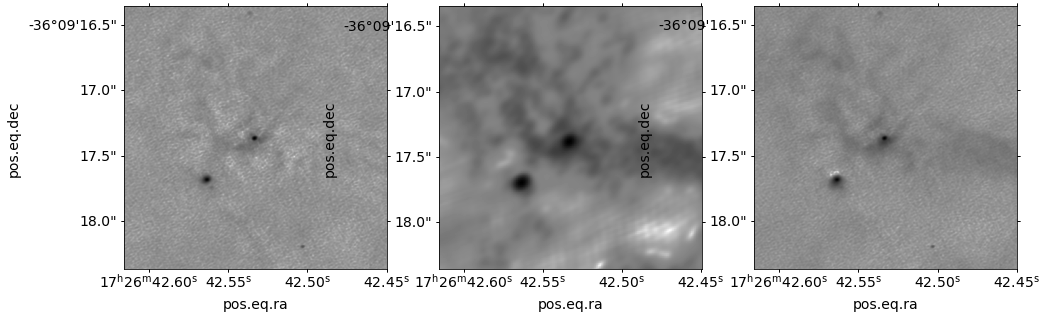

In [64]:
pl.figure(figsize=(16,10))
for ii, cont in enumerate([beuther[0], sanhueza[0], combo]):
    ax = pl.subplot(1,3,ii+1, projection=cont.wcs.celestial)
    ax.imshow(cont.value, cmap='gray_r', norm=visualization.simple_norm(cont.value, stretch='log'))
    #reg[0].to_pixel(cont.wcs.celestial).plot(ax=ax)
    #disk1[0].to_pixel(cont.wcs.celestial).plot(ax=ax)
    #disk2[0].to_pixel(cont.wcs.celestial).plot(ax=ax)
    pp = bigdisk1.to_pixel(cont.wcs.celestial)
    bb = pp.bounding_box
    #ax.axis([bb.ixmin-20, bb.ixmax+20, bb.iymin-20, bb.iymax+20])
    ax.axis([bb.ixmin, bb.ixmax, bb.iymin, bb.iymax])